In [47]:
#import what we're going to need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from scipy.stats import anderson
from astropy.timeseries import LombScargle

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '../working/10s_lightcurves'
lcs = glob.glob(path+'/*.fits')
lcs

['../working/10s_lightcurves/sw00031677006uuuw1po_lc10.fits',
 '../working/10s_lightcurves/sw00031677004uuuw1po_lc10.fits',
 '../working/10s_lightcurves/sw00031677008uuuw1po_lc10.fits',
 '../working/10s_lightcurves/sw00031677005uuuw1po_lc10.fits',
 '../working/10s_lightcurves/sw00031677007uuuw1po_lc10.fits',
 '../working/10s_lightcurves/sw00031677003uuuw1po_lc10.fits']

00031677006
Light curve IS variable
Light curve IS NOT periodic


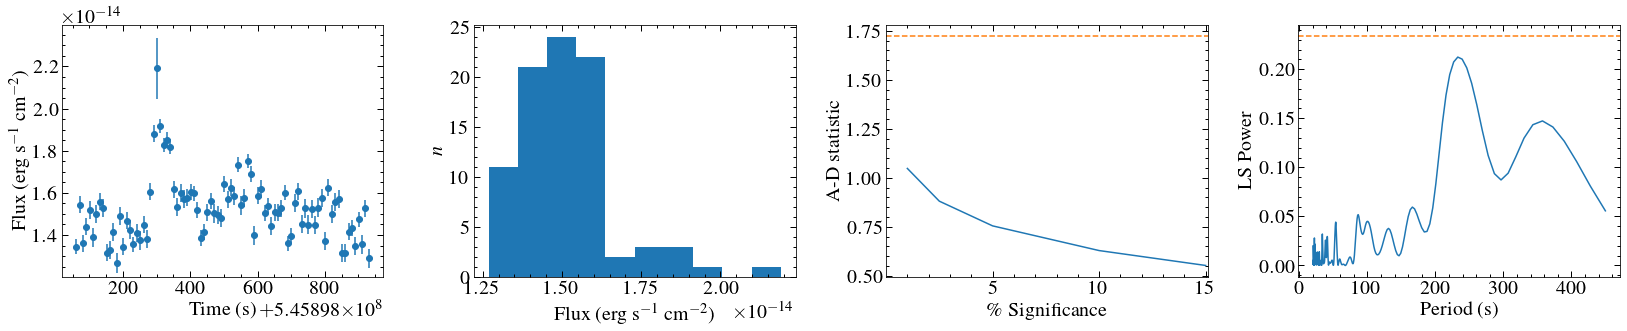

00031677004
Light curve IS NOT variable
Light curve IS NOT periodic


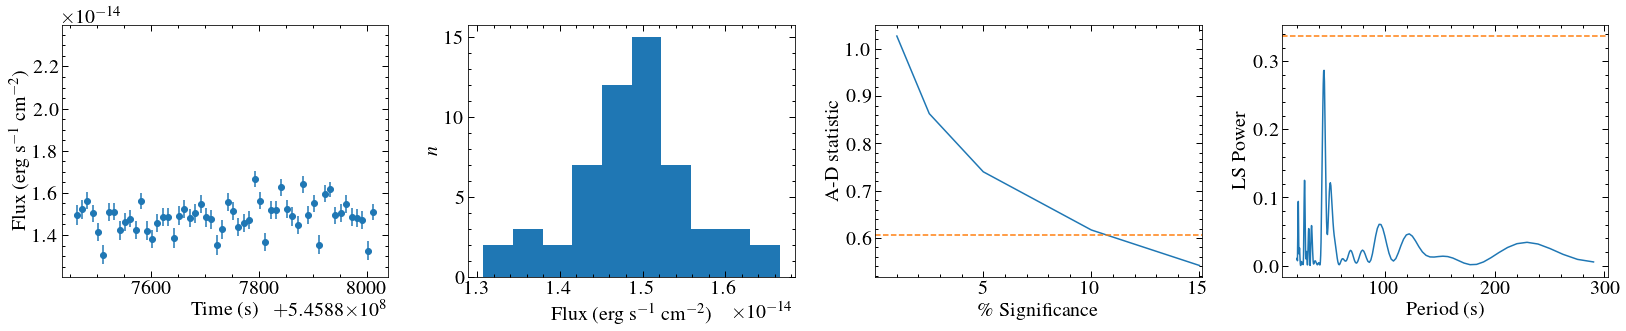

00031677008
Light curve IS NOT variable
Light curve IS NOT periodic


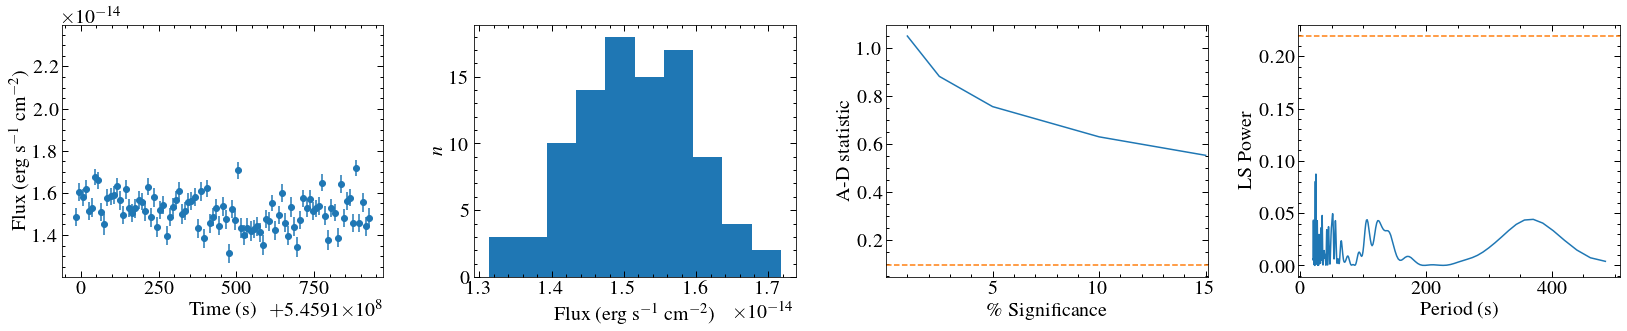

In [97]:
clip =3
for i, lc in enumerate(lcs[0:3]):
    plt.figure(figsize=(23,5))
    hdul = fits.open(lc)
    data = hdul[1].data
    print(hdul[0].header['OBS_ID'])
    hdul.close
    plt.subplot(141)
    plt.errorbar(data['TIME'][:-clip], data['AB_FLUX_AA'][:-clip], yerr = data['AB_FLUX_AA_ERR'][:-clip], marker='o', ls='none')
    plt.xlabel('Time (s)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$)')
    plt.ylim(1.201e-14, 2.399e-14)
    plt.subplot(142)
    plt.hist(data['AB_FLUX_AA'][:-clip], bins = 10)
    plt.xlabel('Flux (erg s$^{-1}$ cm$^{-2}$)')
    plt.ylabel('$n$')
    plt.subplot(143)
    ad = anderson(data['AB_FLUX_AA'][:-clip])
    plt.plot(ad.significance_level, ad.critical_values)
    plt.axhline(ad.statistic, ls='--', c= 'C1')
    if ad.statistic > max(ad.critical_values):
        ad_result = ''
    else:
        ad_result  = ' NOT'
    print('Light curve IS{0} variable'.format(ad_result))
    plt.xlabel('\% Significance')
    plt.ylabel('A-D statistic')
    plt.xlim(0.001, 15.1)
    plt.subplot(144)
    ls = LombScargle(data['TIME'][:-clip], data['AB_FLUX_AA'][:-clip])
    nq = 2*(data['TIME'][1]-data['TIME'][0])
    frequency, power = ls.autopower(maximum_frequency= 1/nq, minimum_frequency=2/(data['TIME'][-1]-data['TIME'][0]), samples_per_peak = 10)
    plt.plot(1/frequency, power)
    plt.axhline(ls.false_alarm_level(0.01), ls='--', c='C1')
    plt.xlabel('Period (s)')
    plt.ylabel('LS Power')
    if max(power) > ls.false_alarm_level(0.01):
        period = 1/(np.frequency[np.argmax(power)])
        print('Light curve IS periodic with Pmax = {0} s'.format(period))
    else:
        print('Light curve IS NOT periodic')
   # print(ad)
   # print (ad.statistic, ad.critical_values[4])
    plt.tight_layout()
    plt.savefig('eg_lc{0}.png'.format(i))
    plt.show()

In [74]:
fits.getheader(lcs[0],1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  507 / width of table in bytes                        
NAXIS2  =                   91 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                  119 / number of fields in each row                   
TTYPE1  = 'MET     '           / Mission time                                   
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'EXTNAME '           / Image identifier                               
TFORM2  = '12A     '        

In [93]:
hdul2 = fits.open('detectU.fits')
hdul2.info()

Filename: detectU.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     242   ()      
  1  SOURCES       1 BinTableHDU    297   370R x 49C   [1D, 1D, 1E, 1E, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1E, 1E, 1E, E, E, E, E, L, E, E, E, E, L, 1E, 1E, 1E, 1E, 1E, 1E, E, E, E]   


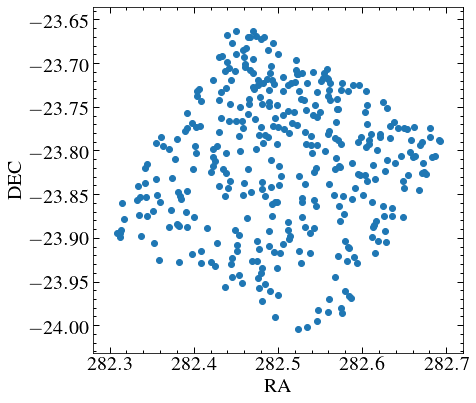

In [96]:
srcs = hdul2[1].data
plt.figure(figsize=(7,6))
plt.scatter(srcs['RA'], srcs['DEC'])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.tight_layout()
plt.savefig('sources.png')


array([], dtype=float64)